In [32]:
"""
Parametrized Circuits: https://youtu.be/adeYx7bwYrA
https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-93.php
"""

'\nParametrized Circuits: https://youtu.be/adeYx7bwYrA\nhttps://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-93.php\n'

In [33]:
import numpy as np
from qiskit.circuit import ParameterVector
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import random_statevector, Statevector
import random
import matplotlib.pyplot as plt

In [34]:
q = 4
qr = QuantumRegister(q, 'q')
def circuit_creator(base_circuit=None):
    qc = QuantumCircuit(qr)
    theta_i = [random.random() for _ in range(q)]
    theta_i = iter(theta_i) 
    # ODD blocks
    qc.rx(next(theta_i),0)
    qc.rx(next(theta_i),1)
    qc.rx(next(theta_i),2)
    qc.rx(next(theta_i),3)
    # Even Blocks
    theta_j = [random.random() for _ in range(q)]
    theta_j = iter(theta_j) 
    qc.rx(next(theta_j),0)
    qc.rx(next(theta_j),1)
    qc.rx(next(theta_j),2)
    qc.rx(next(theta_j),3)
    qc.cz(0,1)
    qc.cz(0,2)
    qc.cz(0,3)
    qc.cz(1,2)
    qc.cz(1,3)
    qc.cz(2,3)
    if base_circuit is None:
        return qc
    return qc.combine(base_circuit)

In [42]:
L = 100
phi =  random_statevector(dims=(2, 2, 2, 2))
psi = Statevector.from_label('0000')
transpiled_qc = circuit_creator()
x_axis = y_axis = []
for i in range(L):
    ret = psi.evolve(transpiled_qc)
    min = np.linalg.norm(psi.data-ret.data)**2
    x_axis.append(i)
    y_axis.append(min)
    transpiled_qc = circuit_creator(transpiled_qc)
transpiled_qc.draw()

├┤ RX(0.14631) ├───────────────»
«            │        │  │ └─────────────┘└─────────────┘┌─────────────┐»
«q_1: ───────■────────┼──┼────────■──────────────■───────┤ RX(0.40162) ├»
«     ┌─────────────┐ │  │        │              │       └─────────────┘»
«q_2: ┤ RX(0.88788) ├─■──┼────────■──────────────┼──────────────■───────»
«     ├─────────────┤    │                       │              │       »
«q_3: ┤ RX(0.90461) ├────■───────────────────────■──────────────■───────»
«     └─────────────┘                                                   »
«                                           ┌─────────────┐┌─────────────┐»
«q_0: ───────────────────────■─────────■──■─┤ RX(0.19711) ├┤ RX(0.72444) ├»
«     ┌─────────────┐        │         │  │ └─────────────┘└─────────────┘»
«q_1: ┤ RX(0.93404) ├────────■─────────┼──┼────────■──────────────■───────»
«     ├─────────────┴┐┌──────────────┐ │  │        │              │       »
«q_2: ┤ RX(0.081607) ├┤ RX(0.096531) ├─■──┼────────■──────────────┼───────»
«     └┬────────────┬┘└┬────────────┬┘    │                       │       »
«q_3: ─┤ RX(0.3453) ├──┤ RX(0.6671) ├─────■───────────────────────■───────»
«      └────────────┘  └────────────┘                                     »
«                                                         ┌─────────────┐»
«q_0: ──────────────────────────────────────■────────■──■─┤ RX(0.37989) ├»
«     ┌──────────────┐┌─────────────┐       │        │  │ └─────────────┘»
«q_1: ┤ RX(0.018809) ├┤ RX(0.30455) ├───────■────────┼──┼────────■───────»
«     └──────────────┘├─────────────┤┌─────────────┐ │  │        │       »
«q_2: ───────■────────┤ RX(0.94577) ├┤ RX(0.86175) ├─■──┼────────■───────»
«            │        ├─────────────┤├─────────────┤    │                »
«q_3: ───────■────────┤ RX(0.36084) ├┤ RX(0.14039) ├────■────────────────»
«                     └─────────────┘└─────────────┘                     »
«     ┌─────────────┐                                                   »
«q_0: ┤ RX(0.46346) ├─────────────────────────────────────■────────■──■─»
«     └─────────────┘┌─────────────┐┌─────────────┐       │        │  │ »
«q_1: ───────■───────┤ RX(0.88809) ├┤ RX(0.35137) ├───────■────────┼──┼─»
«            │       └─────────────┘├─────────────┤┌─────────────┐ │  │ »
«q_2: ───────┼──────────────■───────┤ RX(0.34444) ├┤ RX(0.66914) ├─■──┼─»
«            │              │       ├─────────────┤└┬────────────┤    │ »
«q_3: ───────■──────────────■───────┤ RX(0.95835) ├─┤ RX(0.9484) ├────■─»
«                                   └─────────────┘ └────────────┘      »
«     ┌─────────────┐┌─────────────┐                              »
«q_0: ┤ RX(0.62296) ├┤ RX(0.79146) ├──────────────────────────────»
«     └─────────────┘└─────────────┘┌─────────────┐┌─────────────┐»
«q_1: ───────■──────────────■───────┤ RX(0.66754) ├┤ RX(0.83689) ├»
«            │              │       └─────────────┘├─────────────┤»
«q_2: ───────■──────────────┼──────────────■───────┤ RX(0.98023) ├»
«                           │              │       ├─────────────┤»
«q_3: ──────────────────────■──────────────■───────┤ RX(0.22477) ├»
«                                                  └─────────────┘»
«                          ┌─────────────┐┌──────────────┐               »
«q_0: ───────■────────■──■─┤ RX(0.97502) ├┤ RX(0.095384) ├───────────────»
«            │        │  │ └─────────────┘└──────────────┘┌─────────────┐»
«q_1: ───────■────────┼──┼────────■──────────────■────────┤ RX(0.16827) ├»
«     ┌─────────────┐ │  │        │              │        └─────────────┘»
«q_2: ┤ RX(0.31642) ├─■──┼────────■──────────────┼───────────────■───────»
«     └┬────────────┤    │                       │               │       »
«q_3: ─┤ RX(0.8389) ├────■───────────────────────■───────────────■───────»
«      └────────────┘                                                    »
«                                            ┌─────────────┐┌────────────┐»
«q_0: ─────────────────────────■────────■──■─┤ RX(0.94271) ├┤

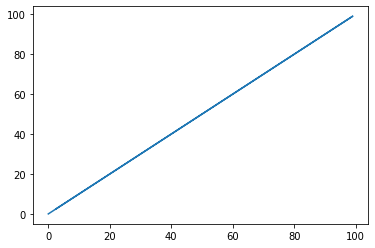

In [43]:
plt.plot(x_axis ,y_axis, 'bo')